# HR Retention Study Case

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve,auc

Importing HR Database Records

In [2]:
 hr_data=pd.read_csv("hr_data.csv")
hr_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


Now let's have a look on the dataset

In [3]:
hr_data.shape

(14999, 9)

So our data consisted of 14999 observations and 9 variables.

In [4]:
#Column datatypes
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [5]:
hr_data.columns

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

Displaying unique values of each column

In [6]:
cols=['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary']
for cols in hr_data:
    print(cols)
    print(hr_data[cols].unique())

employee_id
[ 1003  1005  1486 ... 87679 87681 87684]
number_project
[2 5 7 6 4 3]
average_montly_hours
[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145 140 246 126 306 152 269
 127 281 276 182 273 307 309 225 226 308 244 286 161 264 277 275 149 295
 151 249 291 232 130 129 155 265 279 284 221 154 150 267 257 177 144 289
 258 263 251 133 216 300 138 260 183 250 292 283 245 256 278 240 136 301
 243 296 274 164 146 261 285 141 297 156 287 219 254 228 131 252 236 270
 298 192 248 266 238 229 233 268 231 253 302 271 290 235 293 241 218 199
 180 195 237 227 172 206 181 217 310 214 198 211 222 213 202 184 204 288
 220 299 303 212 196 179 205 230 203 280 169 188 178 175 166 163 168 165
 189 162 215 193 176 191 174 201 208 171 111 104 106 100 194 209 185 200
 207 187 210 186 167 108 122 110 115 197 102 109 190  99 101  97 173 121
 170 105 118 119 117 114  96  98 107 123 116 125 113 120 112 124 103]
time_spend_company
[ 3 

In [7]:
hr_data.nunique()

employee_id              14999
number_project               6
average_montly_hours       215
time_spend_company           8
Work_accident                2
left                         2
promotion_last_5years        2
department                  10
salary                       3
dtype: int64

Value of categorical columns

In [8]:
hr_data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [9]:
hr_data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Now summarize our Salary level according to the departments.

In [10]:
summary_sd=pd.concat([pd.crosstab(hr_data[x], hr_data.salary) for x in hr_data.columns[7:8]], keys=hr_data.columns[7:8])
summary_sd

salary                  high   low  medium
           department                     
department IT             83   609     535
           RandD          51   364     372
           accounting     74   358     335
           hr             45   335     359
           management    225   180     225
           marketing      80   402     376
           product_mng    68   451     383
           sales         269  2099    1772
           support       141  1146     942
           technical     201  1372    1147

In order to get a better understanding of our data, we decided to explore it visually

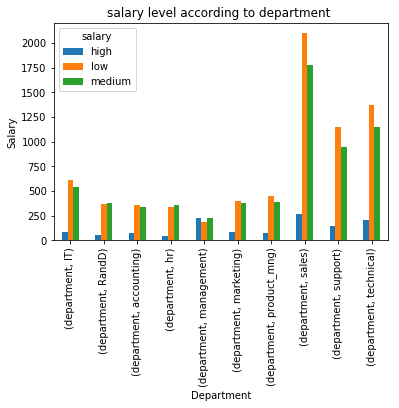

In [11]:
summary_sd.plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.title('salary level according to department ')
plt.show()

Text(0.5,1,'Average_Montly_Hours')

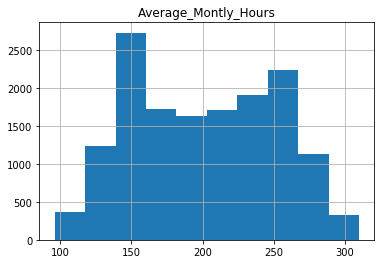

In [12]:
hr_data.average_montly_hours.hist()
plt.title('Average_Montly_Hours')

Text(0.5,1,'Number of projects done by employee')

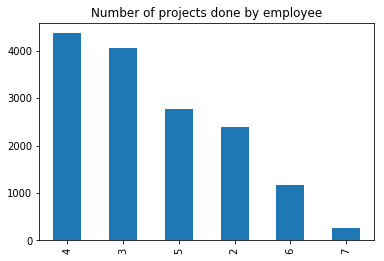

In [13]:
hr_data['number_project'].value_counts().plot(kind='bar')
plt.title('Number of projects done by employee')

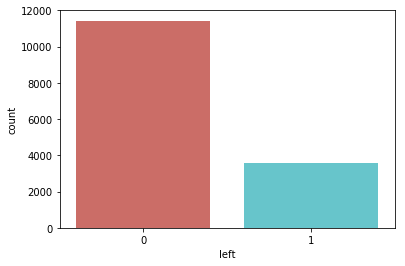

In [14]:
sns.countplot(x='left',data=hr_data, palette='hls')
plt.show()

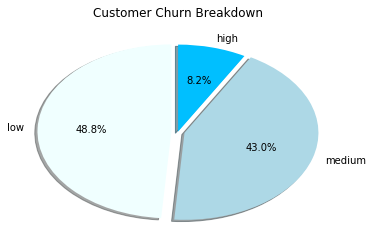

In [15]:
labels = hr_data['salary'].value_counts(sort = True).index
sizes = hr_data['salary'].value_counts(sort = True)
colors = ["azure","lightblue","deepskyblue"]
explode = (0.05,0.05,0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Customer Churn Breakdown')
plt.show()

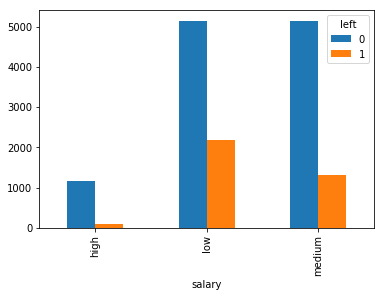

In [16]:
pd.crosstab(hr_data.salary,hr_data.left).plot(kind='bar')

In [17]:
summary_left = pd.concat([pd.crosstab(hr_data[x], hr_data.left) for x in hr_data.columns[8:9]], keys=hr_data.columns[8:9])
summary_left

left              0     1
       salary            
salary high    1155    82
       low     5144  2172
       medium  5129  1317

Loading our Evaluation and Employee Satisfaction Data

In [18]:
emp_sat_data=pd.read_excel("employee_satisfaction_evaluation.xlsx")
emp_sat_data.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [19]:
emp_sat_data.shape

(14999, 3)

Merge our dataset

In [20]:
dataset= hr_data.set_index('employee_id').join(emp_sat_data.set_index('EMPLOYEE #'))
dataset=dataset.reset_index()

In [21]:
dataset.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


Just check null values

In [22]:
dataset.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [23]:
dataset.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
dataset.fillna(dataset.mean(),inplace=True)

In [25]:
dataset.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

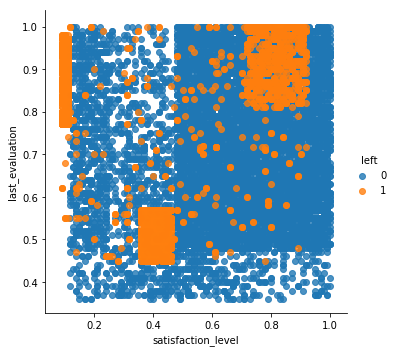

In [26]:
sns.lmplot(y='last_evaluation', x = 'satisfaction_level', data=dataset, hue='left', fit_reg=False)
plt.show()

In [27]:
final_dataset=dataset.drop(columns="employee_id")
final_dataset.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


# Preparing our Dataset for ML

In [28]:
categorical = ['department','salary']
final_dataset = pd.get_dummies(final_dataset, columns=categorical, drop_first=True)

In [29]:
final_dataset.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [30]:
X = final_dataset.drop(['left'],axis=1).values
y = final_dataset['left'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model 1 :- Logistic Regression

In [33]:
model_lr = LogisticRegression(solver='lbfgs',random_state=0)
model_lr.fit(X_train, y_train)

y_train_pred_lr = model_lr.predict(X_train)
y_test_pred_lr = model_lr.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_lr, y_test)))
print(confusion_matrix(y_test, y_test_pred_lr))
print(classification_report(y_test, y_test_pred_lr))

Accuracy 78.49%
[[3154  255]
 [ 713  378]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3409
           1       0.60      0.35      0.44      1091

    accuracy                           0.78      4500
   macro avg       0.71      0.64      0.65      4500
weighted avg       0.76      0.78      0.76      4500



In [34]:
y_pred_proba_lr = model_lr.predict_proba(X_test)
y_pred_proba_lr

array([[0.99748414, 0.00251586],
       [0.82987972, 0.17012028],
       [0.9724905 , 0.0275095 ],
       ...,
       [0.73285011, 0.26714989],
       [0.58551377, 0.41448623],
       [0.57137713, 0.42862287]])

Since the default threshold is 0.5

In [35]:
for a in np.arange(0,1,0.01):
    predict_mine = np.where(y_pred_proba_lr[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 3409  , type 2 error : 0  , type 1 error: 3409
Errors at threshold  0.01 : 3321  , type 2 error : 0  , type 1 error: 3321
Errors at threshold  0.02 : 3158  , type 2 error : 0  , type 1 error: 3158
Errors at threshold  0.03 : 3004  , type 2 error : 7  , type 1 error: 2997
Errors at threshold  0.04 : 2857  , type 2 error : 15  , type 1 error: 2842
Errors at threshold  0.05 : 2688  , type 2 error : 20  , type 1 error: 2668
Errors at threshold  0.06 : 2522  , type 2 error : 29  , type 1 error: 2493
Errors at threshold  0.07 : 2384  , type 2 error : 32  , type 1 error: 2352
Errors at threshold  0.08 : 2266  , type 2 error : 40  , type 1 error: 2226
Errors at threshold  0.09 : 2119  , type 2 error : 43  , type 1 error: 2076
Errors at threshold  0.1 : 1993  , type 2 error : 48  , type 1 error: 1945
Errors at threshold  0.11 : 1914  , type 2 error : 60  , type 1 error: 1854
Errors at threshold  0.12 : 1853  , type 2 error : 82  , type 1 error: 1771
Errors at threshol

From above we select 0.4 as threshold value

In [36]:
y_pred_class=[]
for value in y_pred_proba_lr[:,1]:
    if value > 0.4:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 

In [37]:
acc_lr="{0:.2f}%".format(100*accuracy_score(y_pred_class, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred_class, y_test)))
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

Accuracy 79.76%
[[2997  412]
 [ 499  592]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3409
           1       0.59      0.54      0.57      1091

    accuracy                           0.80      4500
   macro avg       0.72      0.71      0.72      4500
weighted avg       0.79      0.80      0.79      4500



Because of changing threshold value f1-score has increased.

ROC curve plot

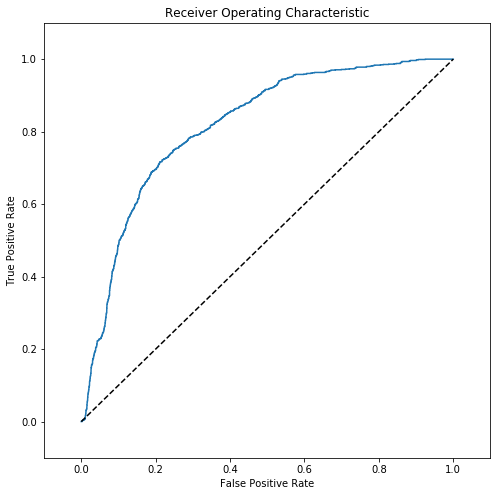

In [38]:
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_pred_proba_lr[:,1])

fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

plt.plot(fpr_lr, tpr_lr, label='l1')
plt.plot([0,1],[0,1], 'k--')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
#AUC for Train set
auc_train_lr=roc_auc_score(y_train, y_train_pred_lr)
print(auc_train_lr)
#AUC for Test set
auc_test_lr=auc(fpr_lr, tpr_lr)
print(auc_test_lr)

0.6404383590987534
0.816083968166435


# Model 2 :-  Random Forest

In [40]:
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)

y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)

acc_rf="{0:.2f}%".format(100*accuracy_score(y_test_pred_rf, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_rf, y_test)))
print(confusion_matrix(y_test, y_test_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

Accuracy 98.76%
[[3403    6]
 [  50 1041]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3409
           1       0.99      0.95      0.97      1091

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [41]:
y_pred_proba_rf = model_rf.predict_proba(X_test)
y_pred_proba_rf

array([[0.99, 0.01],
       [0.94, 0.06],
       [0.97, 0.03],
       ...,
       [0.99, 0.01],
       [0.03, 0.97],
       [0.  , 1.  ]])

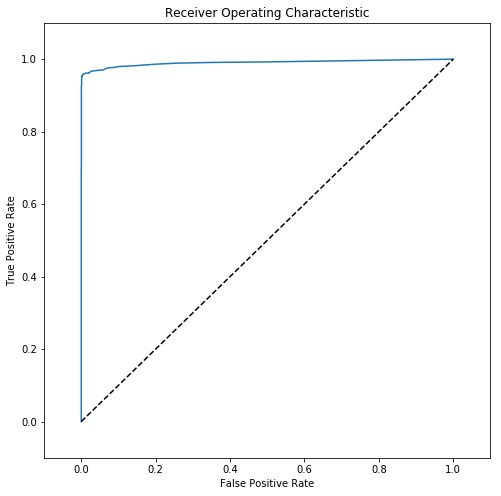

In [42]:
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_proba_rf[:,1])

fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

plt.plot(fpr_rf, tpr_rf, label='l1')
plt.plot([0,1],[0,1], 'k--')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
#AUC for Train set
auc_train_rf=roc_auc_score(y_train, y_train_pred_rf)
print(auc_train_rf)
#AUC for Test set
auc_test_rf=auc(fpr_rf, tpr_rf)
print(auc_test_rf)

1.0
0.9903374875209017


# Model 3 :- Decision Tree

In [44]:
model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train, y_train)

y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)
score = model_dt.score(X_test, y_test)

acc_dt="{0:.2f}%".format(100*accuracy_score(y_test_pred_dt, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_dt, y_test)))
print(confusion_matrix(y_test, y_test_pred_dt))
print(classification_report(y_test, y_test_pred_dt))

Accuracy 97.67%
[[3346   63]
 [  42 1049]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3409
           1       0.94      0.96      0.95      1091

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [45]:
y_pred_proba_dt = model_dt.predict_proba(X_test)
y_pred_proba_dt

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

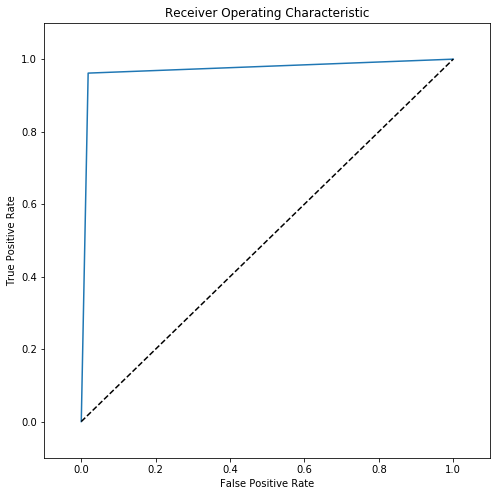

In [46]:
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_proba_dt[:,1])

fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

plt.plot(fpr_dt, tpr_dt, label='l1')
plt.plot([0,1],[0,1], 'k--')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
#AUC for Train set
auc_train_dt=roc_auc_score(y_train, y_train_pred_dt)
print(auc_train_dt)
#AUC for Test set
auc_test_dt=auc(fpr_dt, tpr_dt)
print(auc_test_dt)

1.0
0.9715113576264265


# Model 4 :- Knn Classifier 

In [48]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

y_train_pred_knn = model_knn.predict(X_train)
y_test_pred_knn = model_knn.predict(X_test)
score = model_knn.score(X_test, y_test)

acc_knn="{0:.2f}%".format(100*accuracy_score(y_test_pred_knn, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_knn, y_test)))
print(confusion_matrix(y_test, y_test_pred_knn))
print(classification_report(y_test, y_test_pred_knn))

Accuracy 94.56%
[[3253  156]
 [  89 1002]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3409
           1       0.87      0.92      0.89      1091

    accuracy                           0.95      4500
   macro avg       0.92      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500



In [49]:
y_pred_proba_knn = model_dt.predict_proba(X_test)
y_pred_proba_knn

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

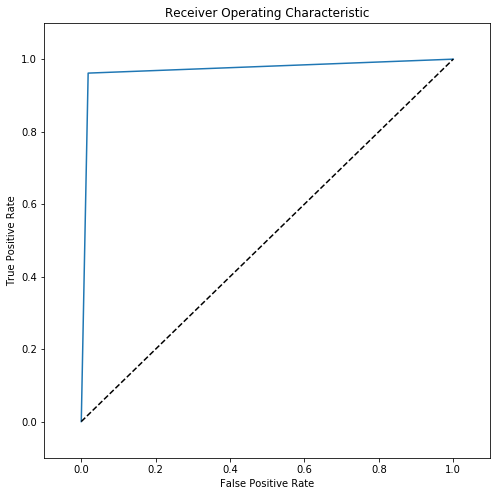

In [50]:
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_proba_knn[:,1])

fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

plt.plot(fpr_knn, tpr_knn, label='l1')
plt.plot([0,1],[0,1], 'k--')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
#AUC for Train set
auc_train_knn=roc_auc_score(y_train, y_train_pred_knn)
print(auc_train_knn)
#AUC for Test set
auc_test_knn=auc(fpr_knn, tpr_knn)
print(auc_test_knn)

0.9704485616821339
0.9715113576264265


# Model 5 :- SVC  

In [52]:
model_svc = SVC(kernel = 'rbf', random_state=0)
model_svc.fit(X_train, y_train)

y_train_pred_svc = model_svc.predict(X_train)
y_test_pred_svc = model_svc.predict(X_test)
score = model_svc.score(X_test, y_test)

acc_svc="{0:.2f}%".format(100*accuracy_score(y_test_pred_svc, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_svc, y_test)))
print(confusion_matrix(y_test, y_test_pred_svc))
print(classification_report(y_test, y_test_pred_svc))

Accuracy 94.71%
[[3289  120]
 [ 118  973]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3409
           1       0.89      0.89      0.89      1091

    accuracy                           0.95      4500
   macro avg       0.93      0.93      0.93      4500
weighted avg       0.95      0.95      0.95      4500



In [53]:
y_pred_proba_svc = model_dt.predict_proba(X_test)
y_pred_proba_svc

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

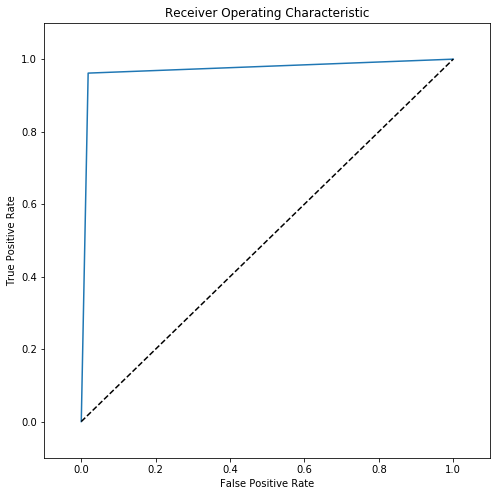

In [54]:
fpr_svc, tpr_svc, thresholds = roc_curve(y_test, y_pred_proba_svc[:,1])

fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr_svc, tpr_svc, label='l1')

# Diagonal 45 degree line
plt.plot([0,1],[0,1], 'k--')

# Axes limits and labels
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
#AUC for Train set
auc_train_svc=roc_auc_score(y_train, y_train_pred_svc)
print(auc_train_svc)
#AUC for Test set
auc_test_svc=auc(fpr_svc, tpr_svc)
print(auc_test_svc)

0.9371472591305328
0.9715113576264265


# Model 6 :- XG Boost

In [56]:
model_xgb = XGBClassifier(random_state=0)
model_xgb.fit(X_train, y_train)

y_train_pred_xgb = model_xgb.predict(X_train)
y_test_pred_xgb = model_xgb.predict(X_test)
score = model_xgb.score(X_test, y_test)

acc_xgb="{0:.2f}%".format(100*accuracy_score(y_test_pred_xgb, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_xgb, y_test)))
print(confusion_matrix(y_test, y_test_pred_xgb))
print(classification_report(y_test, y_test_pred_xgb))

Accuracy 97.20%
[[3365   44]
 [  82 1009]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3409
           1       0.96      0.92      0.94      1091

    accuracy                           0.97      4500
   macro avg       0.97      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [57]:
y_pred_proba_xgb = model_xgb.predict_proba(X_test)
y_pred_proba_xgb

array([[0.9918356 , 0.00816441],
       [0.7283246 , 0.2716754 ],
       [0.99793524, 0.00206476],
       ...,
       [0.9136991 , 0.08630091],
       [0.05222452, 0.9477755 ],
       [0.05046254, 0.94953746]], dtype=float32)

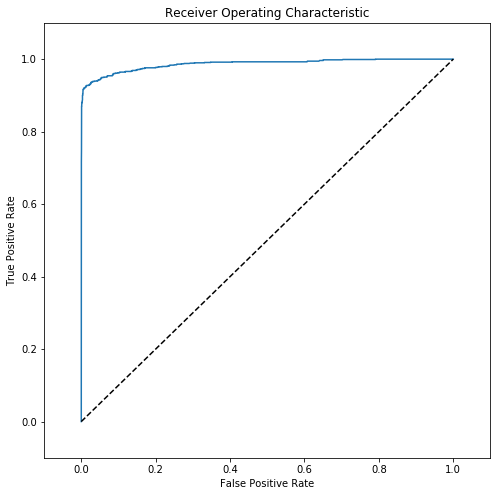

In [58]:
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_pred_proba_xgb[:,1])

fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

plt.plot(fpr_xgb, tpr_xgb, label='l1')
plt.plot([0,1],[0,1], 'k--')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
#AUC for Train set
auc_train_xgb=roc_auc_score(y_train, y_train_pred_xgb)
print(auc_train_xgb)
#AUC for Test set
auc_test_xgb=auc(fpr_xgb, tpr_xgb)
print(auc_test_xgb)

0.9597337120709283
0.9866377860513189


# Model Comparison

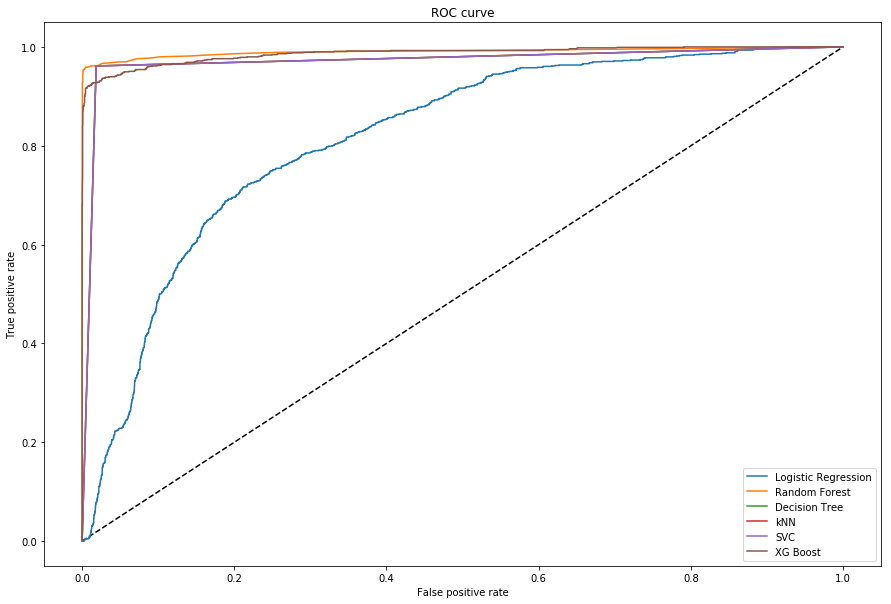

In [60]:
plt.figure(figsize=(15, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_knn, tpr_knn, label='kNN')
plt.plot(fpr_svc, tpr_svc, label='SVC')
plt.plot(fpr_xgb, tpr_xgb, label='XG Boost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

As we can see, the model with the best ROC curve is the Random forest Classifier. XG Boost & Decision Tree Classifier are competing for the second place.

Our observations from the AUC concur with the test data scores across all the models, as shown below.

In [61]:
summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'KNN', 'SVC', 
              'XG Boost'],
    'Testing Score': [acc_lr , acc_rf, acc_dt, acc_knn, acc_svc, acc_xgb],
    'AUC': [auc_test_lr,auc_test_rf,auc_test_dt,auc_test_knn,auc_test_svc,auc_test_xgb]
})

summary = summary.sort_values(by=['Testing Score','AUC'], ascending=False).reset_index(drop=True).reindex(range(len(summary)))
summary=summary[['Model','Testing Score','AUC']]

summary

,Model,Testing Score,AUC
0,Random Forest Classifier,98.76%,0.990337
1,Decision Tree Classifier,97.67%,0.971511
2,XG Boost,97.20%,0.986638
3,SVC,94.71%,0.971511
4,KNN,94.56%,0.971511
5,Logistic Regression,79.76%,0.816084


Based on the model scores, Random Forest Classifier seems to be the best model for this dataset.